# Machine Learning session 1

### In this session I am trying to explore various ways to handle imbalanced datasets, specific in the credit card fraud detection space.

### Dataset Overview

### Objectives

In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Chris\anaconda3a\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#load dataset
url = "https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Programming_Sessions/Programming_session_1/credit_data.csv"

df = pd.read_csv(url, index_col = 0)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,Class
0,2.066860,-0.020046,-1.767555,0.733844,0.273100,-0.759437,0.030152,-0.196861,0.970792,-0.436721,...,0.134090,-0.044286,-0.711986,0.196494,0.499970,-0.038726,-0.045336,-0.181653,0.674808,0
1,-3.174988,2.565829,-1.166506,-2.662460,-0.563333,-1.758946,0.158992,1.060015,0.846993,0.084840,...,-0.933422,0.196827,-0.132664,0.321662,0.410302,0.403295,0.305377,-0.293440,0.035762,0
2,-1.358615,-0.694513,0.663246,-0.918161,2.429012,-0.748662,-0.137744,0.109871,1.414226,-1.288576,...,0.351336,-0.169299,0.187691,0.344757,0.024591,0.007354,0.141657,-0.261301,0.151694,0
3,-10.290219,-2.815842,-3.015308,0.670187,-0.323126,-0.012862,2.315149,-1.951854,2.914832,3.560149,...,-1.293607,-1.589622,0.994588,-1.024713,-0.792314,-3.596743,-2.944840,1.928596,0.525946,0
4,2.066360,-1.862311,-0.043096,-1.562647,-1.844436,0.263880,-1.849429,0.190699,-0.890452,1.594112,...,0.208154,0.313158,0.745770,-0.576860,-0.309670,0.047811,-0.020008,0.825683,0.416370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.179733,-1.280758,2.656996,0.869706,1.303247,0.607617,-0.645940,0.785346,0.434719,-1.006206,...,-0.564053,0.285385,-0.326247,0.423785,-0.582267,0.035910,0.091325,0.936072,-0.157415,0
9996,-0.934501,0.986131,1.355967,-0.736684,0.161198,0.679856,-0.042052,0.767234,-0.263725,-1.076282,...,-0.561473,-0.261469,0.044882,0.387627,-0.426890,-0.060354,0.002852,-0.237546,0.944231,0
9997,-1.208527,1.839633,-0.394665,0.685308,1.690406,0.038521,1.430344,-0.011120,-0.798887,-0.041243,...,0.055274,-0.582994,0.098954,1.247288,-0.245183,-0.145467,-0.341344,-0.097394,0.380855,0
9998,-2.232292,-0.817801,2.946485,4.883228,0.755942,0.194946,-1.715312,0.738208,-0.433090,1.944281,...,0.408406,-0.060580,-0.156623,-0.000038,0.590705,0.441610,0.487050,0.355481,0.477238,0


<Axes: xlabel='feature_4', ylabel='feature_3'>

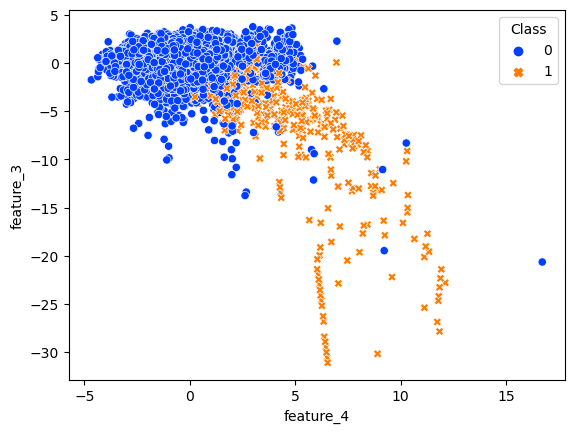

In [3]:
#take a random feature and plot it against another
sns.scatterplot(data = df, x = "feature_4", y = "feature_3", hue = "Class", style = "Class" ,palette = "bright" )

<Axes: xlabel='Class', ylabel='count'>

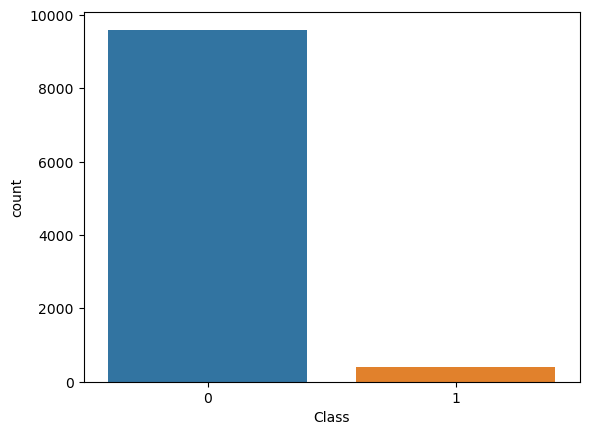

In [4]:
#visualization of imbalanced dataset
sns.countplot(data=df, x="Class")

### Baseline Model

In [5]:
#Extract the feature matrix X and the target vector Y from the DataFrame
X = df.iloc[:,:30].values
Y = df["Class"].values

print(f"The shape of X is {X.shape}")
print(f"The shape of Y is {Y.shape}")

The shape of X is (10000, 30)
The shape of Y is (10000,)


In [6]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [7]:
#Baseline model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, Y_train)

y_hat = lr.predict(X_test)

Text(0.5, 1.0, 'confusion matrix')

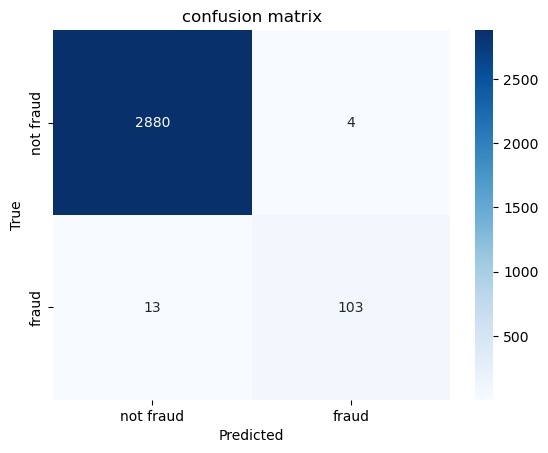

In [8]:
#Visualize the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_hat)
cm

sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues",xticklabels = ["not fraud","fraud"],yticklabels=["not fraud","fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix")

In [9]:
#print classification report to extract precision, recall and F1 score
from sklearn.metrics import classification_report

report  = classification_report(Y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       0.96      0.89      0.92       116

    accuracy                           0.99      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.99      0.99      0.99      3000



### Improving the Model

In [10]:
#Applying SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_smote, Y_smote = sm.fit_resample(X_train,Y_train)
# Now, (X_smote, y_smote) represents your balanced dataset

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2884
           1       0.54      0.91      0.68       116

    accuracy                           0.97      3000
   macro avg       0.77      0.94      0.83      3000
weighted avg       0.98      0.97      0.97      3000



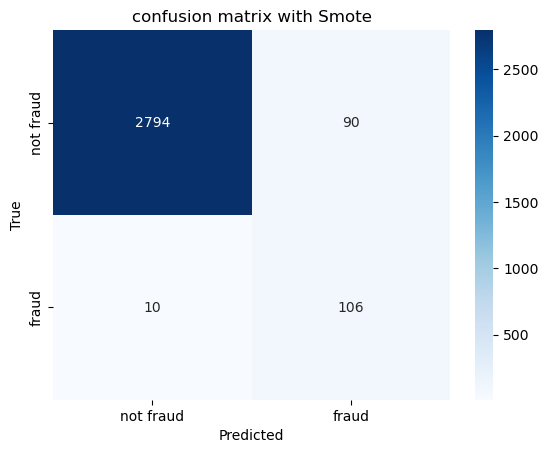

In [11]:
#classification report and confusion matrix of new balanced set
lr_smote = LogisticRegression(max_iter = 200).fit(X_smote, Y_smote)
y_hat_smote = lr_smote.predict(X_test)

cm_smote = confusion_matrix(Y_test, y_hat_smote)
cm_smote
sns.heatmap(cm_smote, annot = True, fmt = "d", cmap = "Blues",xticklabels = ["not fraud","fraud"],yticklabels=["not fraud","fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix with Smote")

report_smote  = classification_report(Y_test, y_hat_smote)
print(report_smote)